# News Summarization Approaches for NLP

Text summarization in NLP is the process of summarizing the information in large texts for quicker consumption. In this notebook, I will walk you through the traditional extractive as well as the advanced generative methods to implement News summarization.

When you open news sites, do you just start reading every news article? Probably not. We typically glance the short news summary and then read more details if interested. Short, informative summaries of the news is now everywhere like magazines, news aggregator apps, research sites, etc.
It is essential for the summary to be a fluent, continuous and depict the significant.

Text summarization methods can be grouped into two main categories: 
- Extractive 
- Abstractive 





In [1]:
#import necessary libraries
## for uploadinf data
import pandas as pd
import os
from pathlib import Path


## for uploadinf data
import pandas as pd
import os
import numpy as np


## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## import necessary nlp libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk import sent_tokenize


from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

# TextRank 
from sumy.summarizers.text_rank import TextRankSummarizer

# LexRank
from sumy.summarizers.lex_rank import LexRankSummarizer

#BART 
from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

import torch

# Evaluation
from rouge import Rouge
rouge = Rouge()


In [2]:
from app import Summarizer
from utils import Article

## Get the Data


In [3]:
DATA_PATH="./dataset/BBC/BBC News Summary/"
newsDF=Article.loading(DATA_PATH)
newsDF.head()

,Category,ID,Article,Summary
0,business,424,"EU-US seeking deal on air dispute , The EU and...",Both sides hope to reach a negotiated deal ove...
1,business,441,"Trade gap narrows as exports rise , The UK's t...",Overall UK exports - including both goods and ...
2,business,214,"Economy 'strong' in election year , UK busines...",The BDO optimism index - a leading indicator o...
3,business,305,"Brazil approves bankruptcy reform , A major re...","The new legislation changes this, giving prior..."
4,business,174,"Yangtze Electric's profits double , Yangtze El...","Yangtze Electric Power, the operator of China'..."


In [4]:
newsDF.to_csv("BBCNewDF.csv")

# Clean the Data

Removing unnecessary text. For Example:
- CURRENCIES
- EMAILS
- CONTRACTIONS

        Contraction: changing short word to long. For Example: “ain’t” = “is not”; “can’t” = “cannot”.
        
Then cleaning and normilzing the text

In [4]:
newsDF["Cleaned_Article"] =newsDF['Article'].apply(lambda x:Article.cleaningArticle(x)) 
newsDF["Cleaned_Summary"] =newsDF['Summary'].apply(lambda x:Article.cleaningSummary(x)) 


In [5]:
newsDF.head()

,Category,ID,Article,Summary,Cleaned_Article,Cleaned_Summary
0,business,424,"EU-US seeking deal on air dispute , The EU and...",Both sides hope to reach a negotiated deal ove...,the eu and us have agreed to begin talks on en...,both sides hope to reach a negotiated deal ove...
1,business,441,"Trade gap narrows as exports rise , The UK's t...",Overall UK exports - including both goods and ...,"the uk's trade gap narrowed in november , help...",overall uk exports including both goods and se...
2,business,214,"Economy 'strong' in election year , UK busines...",The BDO optimism index - a leading indicator o...,uk businesses are set to prosper during the ne...,the bdo optimism index a leading indicator of ...
3,business,305,"Brazil approves bankruptcy reform , A major re...","The new legislation changes this, giving prior...",a major reform of brazil's bankruptcy laws has...,"the new legislation changes this , giving prio..."
4,business,174,"Yangtze Electric's profits double , Yangtze El...","Yangtze Electric Power, the operator of China'...","yangtze electric power , the operator of china...","yangtze electric power , the operator of china..."


# Plotting Words Distribution

#### Article

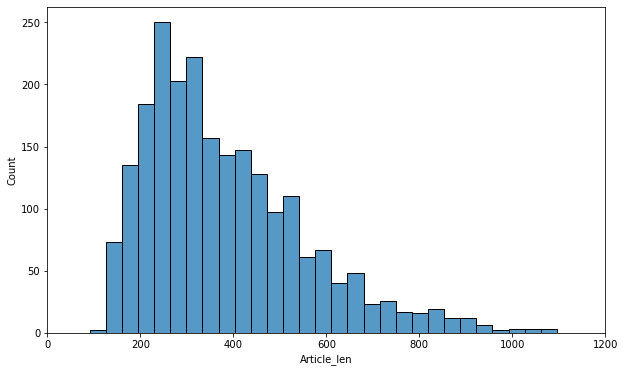

In [6]:
articles = newsDF['Article'].to_list()
newsDF['Article_len'] = newsDF['Article'].apply(lambda x: len(re.findall("\w+",x)))
plt.figure(figsize=(10,6))
plt.xlim([0,1200]) 
sns.histplot(data=newsDF, x='Article_len')
plt.show()

#### Summary

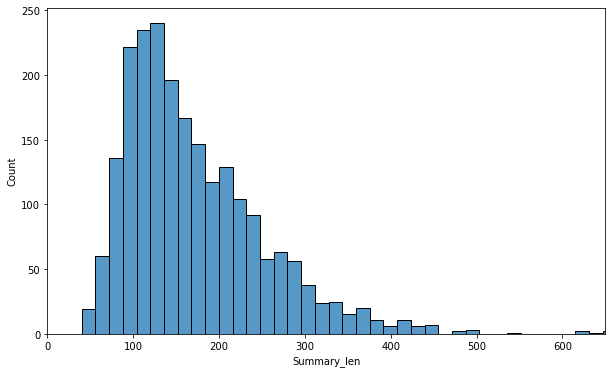

In [7]:
articles = newsDF['Summary'].to_list()
newsDF['Summary_len'] = newsDF['Summary'].apply(lambda x: len(re.findall("\w+",x)))
plt.figure(figsize=(10,6))
plt.xlim([0,650]) 
sns.histplot(data=newsDF, x='Summary_len')
plt.show()

# Extractive Text Summarization

 It is the traditional method developed first. The main objective is to identify the significant sentences of the text and add them to the summary. You need to note that the summary obtained contains exact sentences from the original text.

In this section we will discuss two extractive methods:
 - TextRank 
 - LexRank

## TextRank

TextRank is an extractive summarization technique. It is based on the concept that words which occur more frequently are significant. Hence , the sentences containing highly frequent words are important.

Based on this , the algorithm assigns scores to each sentence in the text . The top-ranked sentences make it to the summary.

After importing the sumy package, the first step is to import TextRankSummarizer from sumy.summarizers.text_rank. It is an in-built model that implements TextRank.

Next, pass the text corpus as input to summarize function

We can decide the number of sentences you want in the summary through parameter sentences_count.
We can change the default parameters of the summarize function according to your requirements.

In [8]:
#Applying TextRank summarization on data
newsDF['Summary (TextRank)'] = newsDF["Cleaned_Article"][:50].apply(lambda x:Summarizer.extracitve(x,TextRankSummarizer,3)) 


In [10]:
x=np.random.randint(0,50)

print("The Whole Article : \n------------------\n",newsDF["Cleaned_Article"][x])
print("------------------------------------------------------------------------------------------------------------------")
print("Summary (TextRank) : \n------------------\n",newsDF["Summary (TextRank)"][x])
print("------------------------------------------------------------------------------------------------------------------")
print("Our Summary Ref : \n------------------\n",newsDF["Cleaned_Summary"][x])


The Whole Article : 
------------------
 australia is raising its benchmark interest rate to its highest level in four years despite signs of a slowdown in the country's economy . , the reserve bank of australia lifted interest rates 025 % to 55 % , their first upwards move in more than a year . however , shortly after the bank made its decision , new figures showed a fall in economic growth in the last quarter . the bank said it had acted to curb inflation but the move was criticised by some analysts . , the rate hike was the first since december 2003 and had been well flagged in advance . however , opposition parties and some analysts said the move was ill timed given data showing the australian economy grew just 01 % between october and december and 15 % on an annual basis . , the figures , representing a decline from the 02 % growth in gdp seen between july and september , were below market expectations . consumer spending remains strong , however , and the bank is concerned about 

In [12]:
pd.DataFrame(Summarizer.summaryScore(newsDF['Summary (TextRank)'][:50],newsDF['Cleaned_Summary'][:50],Avg=True))

,rouge-1,rouge-2,rouge-l
r,0.534711,0.454288,0.527834
p,0.877832,0.811927,0.867539
f,0.655684,0.571878,0.647561


let's look at our TestRank Rouge-n score distribution

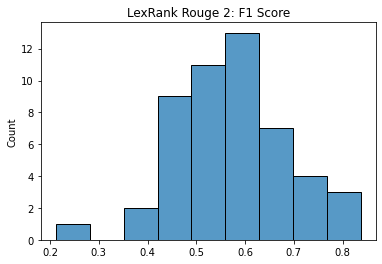

In [13]:
#Plot our TestRank Rouge-n score distribution 
TextRankSummaryrougeF1Score=[]
for i in range(0,len(newsDF['Summary (TextRank)'][:50].values)):
    TextRankSummaryrougeF1Score.append(Summarizer.summaryScore(newsDF['Summary (TextRank)'].values[i],newsDF['Cleaned_Summary'].values[i],Avg=True)['rouge-2']['f'])
plt.title("LexRank Rouge 2: F1 Score")

sns.histplot(TextRankSummaryrougeF1Score);

In [12]:
# newsDF.to_pickle('./dataset/TextRankSummaryBBC.p')
# newsDF=pd.read_pickle("./dataset/TextRankSummaryBBC.p")


Similar to TextRank , there is LexRank algorithm which perform summarization.

## LexRank

Along with TextRank , sumy has various other algorithms to summarize text.
In this section, I shall discuss on implementation of the LexRank algorithm for summarization using sumy.

A sentence which is similar to many other sentences of the text has a high probability of being important. The approach of LexRank is that a particular sentence is recommended by other similar sentences and hence is ranked higher.Higher the rank, higher is the priority of being included in the summarized text.


We import PlaintextParser since we have a article stored as a string hence we use it Along with parser, you have to import Tokenizer for segmenting the raw text into tokens.

As the text source here is a string, you need to use PlainTextParser.from_string() function to initialize the parser. You can specify the language used as input to the Tokenizer.

In [14]:
#Applying LexRank on data
newsDF['Summary (LexRank)'] = newsDF["Cleaned_Article"][:50].apply(lambda x:Summarizer.extracitve(x,LexRankSummarizer,3)) 


In [15]:
print("The Whole Article : \n------------------\n",newsDF["Cleaned_Article"][x])
print("------------------------------------------------------------------------------------------------------------------")
print("Summary (LexRank) : \n------------------\n",newsDF["Summary (LexRank)"][x])
print("------------------------------------------------------------------------------------------------------------------")
print("Our Summary Ref : \n------------------\n",newsDF["Cleaned_Summary"][x])


The Whole Article : 
------------------
 australia is raising its benchmark interest rate to its highest level in four years despite signs of a slowdown in the country's economy . , the reserve bank of australia lifted interest rates 025 % to 55 % , their first upwards move in more than a year . however , shortly after the bank made its decision , new figures showed a fall in economic growth in the last quarter . the bank said it had acted to curb inflation but the move was criticised by some analysts . , the rate hike was the first since december 2003 and had been well flagged in advance . however , opposition parties and some analysts said the move was ill timed given data showing the australian economy grew just 01 % between october and december and 15 % on an annual basis . , the figures , representing a decline from the 02 % growth in gdp seen between july and september , were below market expectations . consumer spending remains strong , however , and the bank is concerned about 

In [17]:
pd.DataFrame(Summarizer.summaryScore(newsDF['Summary (LexRank)'][:50],newsDF['Cleaned_Summary'][:50], Avg=True))

,rouge-1,rouge-2,rouge-l
r,0.401638,0.291432,0.389826
p,0.774881,0.637968,0.752442
f,0.517802,0.389364,0.502580


let's look at our LexRank Rouge-n score distribution

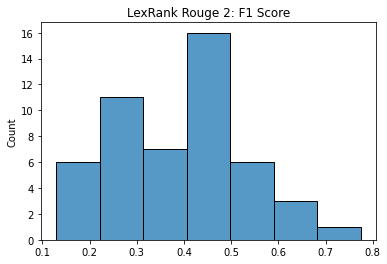

In [18]:
#plot our LexRank Rouge-n score distribution
LexRankSummaryrougeF1Score=[]
for i in range(0,len(newsDF['Summary (LexRank)'][:50].values)):
    LexRankSummaryrougeF1Score.append(Summarizer.summaryScore(newsDF['Summary (LexRank)'].values[i],newsDF['Cleaned_Summary'].values[i],Avg=True)['rouge-2']['f'])
plt.title("LexRank Rouge 2: F1 Score")
sns.histplot(LexRankSummaryrougeF1Score);


In [17]:
# newsDF.to_pickle('./dataset/LexRankSummaryBBC.p')
# newsDF=pd.read_pickle("./dataset/LexRankSummaryBBC.p")

### It's time to compare TextRank with LexRank based on their Rouge score.

In [19]:
text_rank_scores = Summarizer.summaryScore(newsDF['Summary (TextRank)'][:50],newsDF['Cleaned_Summary'][:50], Avg=True)
lex_rank_scores = Summarizer.summaryScore(newsDF['Summary (LexRank)'][:50],newsDF['Cleaned_Summary'][:50], Avg=True)

text_rank_scores_df = pd.DataFrame(text_rank_scores)
lex_rank_scores_df = pd.DataFrame(lex_rank_scores)

scores_df = text_rank_scores_df.join(lex_rank_scores_df, lsuffix=' (TextRank)', rsuffix=' (LexRank)').sort_index(axis=1)
scores_df

,rouge-1 (LexRank),rouge-1 (TextRank),rouge-2 (LexRank),rouge-2 (TextRank),rouge-l (LexRank),rouge-l (TextRank)
r,0.401638,0.534711,0.291432,0.454288,0.389826,0.527834
p,0.774881,0.877832,0.637968,0.811927,0.752442,0.867539
f,0.517802,0.655684,0.389364,0.571878,0.502580,0.647561


# Abstractive Text Summarization

Abstractive summarization is the new state of art method, which generates new sentences that could best represent the whole text. This is better than extractive methods where sentences are just selected from original text for the summary.

Some common abstractive models are :
- GPT-2
- GPT-3
- BERT 
- OpenAI
- GPT
- T5
- BART

An awesome feature with transformers is that it provides PreTrained models with weights that can be easily instantiated through from_pretrained() method.
In this section we will discuss on BART transformer implementation. 


##  BART Transformer

BART is an encoder-decoder model. It converts all language problems into a text-to-text format.

In [20]:
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-xsum")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-xsum")

In [30]:
newsDF['BARTSummary'] = newsDF["Article"][:50].apply(lambda x:Summarizer.abstractive(x,tokenizer,model)) 


/home/mo/anaconda3/lib/python3.7/site-packages/transformers/generation_utils.py:1648: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


In [31]:
print("The Whole Article : \n------------------\n",newsDF["Article"][x])
print("------------------------------------------------------------------------------------------------------------------")
print("BARTSummary : \n------------------\n",newsDF["BARTSummary"][x])
print("------------------------------------------------------------------------------------------------------------------")
print("Our Summary Ref : \n------------------\n",newsDF["Summary"][x])


The Whole Article : 
------------------
 Australia rates at four year high , Australia is raising its benchmark interest rate to its highest level in four years despite signs of a slowdown in the country's economy. , The Reserve Bank of Australia lifted interest rates 0.25% to 5.5%, their first upwards move in more than a year. However, shortly after the Bank made its decision, new figures showed a fall in economic growth in the last quarter. The Bank said it had acted to curb inflation but the move was criticised by some analysts. , The rate hike was the first since December 2003 and had been well-flagged in advance. However, opposition parties and some analysts said the move was ill-timed given data showing the Australian economy grew just 0.1% between October and December and 1.5% on an annual basis. , The figures, representing a decline from the 0.2% growth in GDP seen between July and September, were below market expectations. Consumer spending remains strong, however, and the Ban

In [38]:
pd.DataFrame(Summarizer.summaryScore(newsDF['BARTSummary'][:50],newsDF['Summary'][:50], Avg=True))


,rouge-1,rouge-2,rouge-l
r,0.270012,0.098743,0.237869
p,0.408980,0.148026,0.359771
f,0.318963,0.115572,0.280923


let's look at our LexRank Rouge-n score distribution

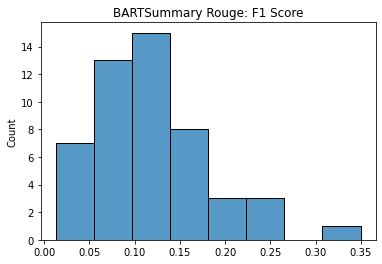

In [44]:
#plot our LexRank Rouge-n score distribution
BARTSummaryrougeF1Score=[]
for i in range(0,len(newsDF['Summary (LexRank)'][:50].values)):
    BARTSummaryrougeF1Score.append(Summarizer.summaryScore(newsDF['BARTSummary'].values[i],newsDF['Summary'].values[i],Avg=True)['rouge-2']['f'])
plt.title("BARTSummary Rouge: F1 Score")
sns.histplot(BARTSummaryrougeF1Score);


In [42]:

bart_scores =Summarizer.summaryScore(newsDF['BARTSummary'][:50],newsDF['Summary'][:50], Avg=True)


text_rank_scores_df = pd.DataFrame(text_rank_scores)
lex_rank_scores_df = pd.DataFrame(lex_rank_scores)
bart_scores_df = pd.DataFrame(bart_scores)
text_rank_scores_df.columns=text_rank_scores_df.columns+"(Text Rank)"
lex_rank_scores_df.columns=lex_rank_scores_df.columns+"(Lex Rank)"
bart_scores_df.columns=bart_scores_df.columns+"(BART)"


### It's time to compare  all the models based on their Rouge score.

In [43]:
pd.concat([text_rank_scores_df,lex_rank_scores_df,bart_scores_df],axis=1)

,rouge-1(Text Rank),rouge-2(Text Rank),rouge-l(Text Rank),rouge-1(Lex Rank),rouge-2(Lex Rank),rouge-l(Lex Rank),rouge-1(BART),rouge-2(BART),rouge-l(BART)
r,0.534711,0.454288,0.527834,0.401638,0.291432,0.389826,0.270012,0.098743,0.237869
p,0.877832,0.811927,0.867539,0.774881,0.637968,0.752442,0.408980,0.148026,0.359771
f,0.655684,0.571878,0.647561,0.517802,0.389364,0.502580,0.318963,0.115572,0.280923


In [ ]:
# newsDF.to_pickle('./dataset/BARTSummaryBBC.p')
# newsDF=pd.read_pickle("./dataset/BARTSummaryBBC.p")